In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

In [27]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(), # convert images to tensors
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)) # normalize the pixel values
])

In [7]:
# Download and load the training data
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Download and load the testing data
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

100%|██████████| 170498071/170498071 [09:33<00:00, 297198.05it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [8]:
print(f"Size of training set: {len(trainset)}")
print(f"Size of testing set: {len(testset)}")

Size of training set: 50000
Size of testing set: 10000


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

In [14]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

In [17]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

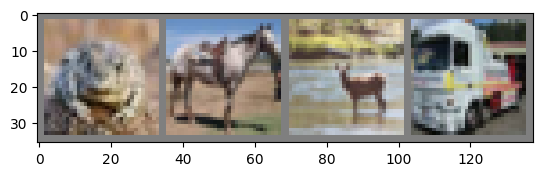

frog  horse deer  truck


In [18]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))

/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

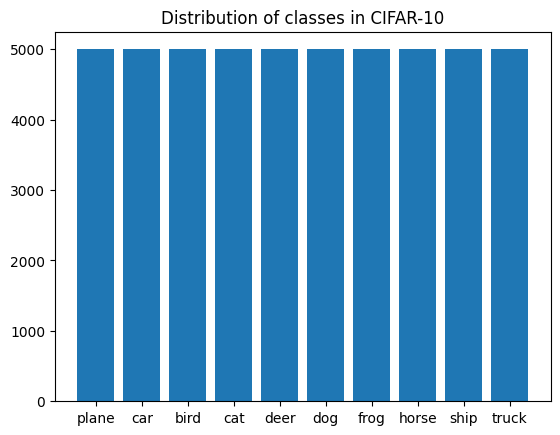

In [19]:
from collections import Counter

label_count = Counter()

for _, labels in trainloader:
    label_count.update(labels.tolist())

plt.bar(label_count.keys(), label_count.values(), tick_label=[classes[i] for i in label_count.keys()])
plt.title('Distribution of classes in CIFAR-10')
plt.show()

In [25]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional Layer 1: 3 input channels (RGB), 16 output channels, kernel size of 5
        self.conv1 = nn.Conv2d(3, 16, 5)
        # Max Pooling Layer 1: kernel size of 2
        self.pool = nn.MaxPool2d(2, 2)
        # Convolutional Layer 2: 16 input channels, 32 output channels, kernel size of 5
        self.conv2 = nn.Conv2d(16, 32, 5)
        # Fully Connected Layer 1: (32 * 5 * 5) inputs, 120 outputs
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        # Fully Connected Layer 2: 120 inputs, 84 outputs
        self.fc2 = nn.Linear(120, 84)
        # Fully Connected Layer 3: 84 inputs, 10 outputs (10 classes)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Apply first convolution and pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Apply second convolution and pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the output from the convolutional layers to feed into the fully connected layer
        x = x.view(-1, 32 * 5 * 5)
        # Apply the first fully connected layer with ReLU activation function
        x = F.relu(self.fc1(x))
        # Apply the second fully connected layer with ReLU activation function
        x = F.relu(self.fc2(x))
        # Apply the third fully connected layer to get the final output
        x = self.fc3(x)
        return x

# Create an instance of the network
net_without = SimpleCNN()



In [30]:
class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net_with_dropout = NetWithDropout()


In [31]:
net_without.to(device)
net_with_dropout.to(device)

NetWithDropout(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer_without_dropout = optim.SGD(net_without.parameters(), lr=0.001, momentum=0.9)
optimizer_with_dropout = optim.SGD(net_with_dropout.parameters(), lr=0.001, momentum=0.9)
def train_model(model, optimizer, trainloader, device, epochs=10):
    model.train()  # Set the model to training mode
    for epoch in range(epochs):  # Loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # zero the parameter gradients

            outputs = model(inputs)  # forward pass
            loss = criterion(outputs, labels)
            loss.backward()  # backward pass
            optimizer.step()  # optimize

            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0


In [33]:
train_model(net_without, optimizer_without_dropout, trainloader, device, epochs=10)
train_model(net_with_dropout, optimizer_with_dropout, trainloader, device, epochs=10)


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[1,  2000] loss: 2.139
[1,  4000] loss: 1.728
[1,  6000] loss: 1.556
[1,  8000] loss: 1.470
[1, 10000] loss: 1.405
[1, 12000] loss: 1.366


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[2,  2000] loss: 1.271
[2,  4000] loss: 1.219
[2,  6000] loss: 1.209
[2,  8000] loss: 1.172
[2, 10000] loss: 1.165
[2, 12000] loss: 1.117


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[3,  2000] loss: 1.027
[3,  4000] loss: 1.044
[3,  6000] loss: 1.018
[3,  8000] loss: 1.026
[3, 10000] loss: 1.011
[3, 12000] loss: 1.018


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[4,  2000] loss: 0.904
[4,  4000] loss: 0.885
[4,  6000] loss: 0.909
[4,  8000] loss: 0.911
[4, 10000] loss: 0.925
[4, 12000] loss: 0.913


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[5,  2000] loss: 0.817
[5,  4000] loss: 0.813
[5,  6000] loss: 0.813
[5,  8000] loss: 0.834
[5, 10000] loss: 0.827
[5, 12000] loss: 0.830


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[6,  2000] loss: 0.730
[6,  4000] loss: 0.713
[6,  6000] loss: 0.754
[6,  8000] loss: 0.784
[6, 10000] loss: 0.758
[6, 12000] loss: 0.772


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[7,  2000] loss: 0.642
[7,  4000] loss: 0.664
[7,  6000] loss: 0.689
[7,  8000] loss: 0.718
[7, 10000] loss: 0.711
[7, 12000] loss: 0.701


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[8,  2000] loss: 0.571
[8,  4000] loss: 0.619
[8,  6000] loss: 0.642
[8,  8000] loss: 0.644
[8, 10000] loss: 0.654
[8, 12000] loss: 0.690


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[9,  2000] loss: 0.527
[9,  4000] loss: 0.546
[9,  6000] loss: 0.578
[9,  8000] loss: 0.631
[9, 10000] loss: 0.630
[9, 12000] loss: 0.621


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[10,  2000] loss: 0.481
[10,  4000] loss: 0.525
[10,  6000] loss: 0.555
[10,  8000] loss: 0.554
[10, 10000] loss: 0.580
[10, 12000] loss: 0.584


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[1,  2000] loss: 2.258
[1,  4000] loss: 1.999
[1,  6000] loss: 1.788
[1,  8000] loss: 1.654
[1, 10000] loss: 1.606
[1, 12000] loss: 1.577


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[2,  2000] loss: 1.516
[2,  4000] loss: 1.482
[2,  6000] loss: 1.468
[2,  8000] loss: 1.448
[2, 10000] loss: 1.436
[2, 12000] loss: 1.422


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[3,  2000] loss: 1.373
[3,  4000] loss: 1.369
[3,  6000] loss: 1.376
[3,  8000] loss: 1.344
[3, 10000] loss: 1.341
[3, 12000] loss: 1.329


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[4,  2000] loss: 1.265
[4,  4000] loss: 1.296
[4,  6000] loss: 1.291
[4,  8000] loss: 1.290
[4, 10000] loss: 1.273
[4, 12000] loss: 1.302


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[5,  2000] loss: 1.232
[5,  4000] loss: 1.241
[5,  6000] loss: 1.237
[5,  8000] loss: 1.233
[5, 10000] loss: 1.241
[5, 12000] loss: 1.261


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[6,  2000] loss: 1.187
[6,  4000] loss: 1.202
[6,  6000] loss: 1.204
[6,  8000] loss: 1.185
[6, 10000] loss: 1.206
[6, 12000] loss: 1.207


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[7,  2000] loss: 1.168
[7,  4000] loss: 1.163
[7,  6000] loss: 1.157
[7,  8000] loss: 1.181
[7, 10000] loss: 1.189
[7, 12000] loss: 1.201


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[8,  2000] loss: 1.156
[8,  4000] loss: 1.148
[8,  6000] loss: 1.169
[8,  8000] loss: 1.164
[8, 10000] loss: 1.157
[8, 12000] loss: 1.155


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[9,  2000] loss: 1.125
[9,  4000] loss: 1.136
[9,  6000] loss: 1.131
[9,  8000] loss: 1.162
[9, 10000] loss: 1.147
[9, 12000] loss: 1.141


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

[10,  2000] loss: 1.134
[10,  4000] loss: 1.117
[10,  6000] loss: 1.102
[10,  8000] loss: 1.116
[10, 10000] loss: 1.147
[10, 12000] loss: 1.140


In [36]:
def evaluate_model(model, testloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient tracking
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the 10000 test images: {accuracy:.2f}%')
    return accuracy

# Evaluate both models
accuracy_without_dropout = evaluate_model(net_without, testloader, device)
accuracy_with_dropout = evaluate_model(net_with_dropout, testloader, device)


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

Accuracy of the model on the 10000 test images: 69.82%


/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E854E4B4-D8A9-321E-9852-69F8F3B956BB> /Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/dedeepyaavancha/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/U

Accuracy of the model on the 10000 test images: 62.79%
